## Simulating observations with MUSTANG-2

MUSTANG-2 is a bolometric array on the [Green Bank Telescope](https://en.wikipedia.org/wiki/Green_Bank_Telescope). In this notebook we simulate an observation of the Whirlpool Galaxy (M51).

ProjectedMap:
  shape(nu, y, x): (1, 500, 500)
  stokes: naive
  nu: [93.] GHz
  t: naive
  z: naive
  quantity: rayleigh_jeans_temperature
  units: K_RJ
    min: 0.000e+00
    max: 5.876e-02
  center:
    ra:  05ʰ34ᵐ31.80ˢ
    dec: 22°01’3.00”
  size(y, x): (8.83’, 8.83’)
  resolution(y, x): (1.06”, 1.06”)
  beam(maj, min, rot): (0 rad, 0 rad, 0 rad)
  memory: 4 MB


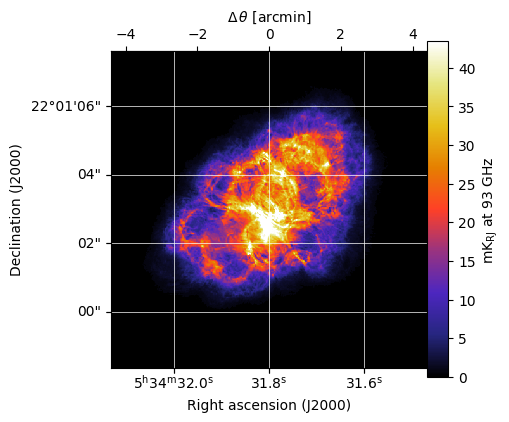

In [1]:
import maria
from maria.io import fetch

input_map = maria.map.load(fetch("maps/crab_nebula.fits"), nu=93e9)

input_map.plot()
print(input_map)

PlanList(2 plans, 900 s):
                           start_time duration    target(ra,dec)  \
chunk                                                              
0      2025-08-12 13:36:59.164 +00:00    600 s  (83.63°, 22.02°)   
1      2025-08-12 13:47:36.664 +00:00    300 s  (83.63°, 22.02°)   

          center(az,el)  
chunk                    
0      (189.5°, 73.42°)  
1      (195.9°, 73.06°)  


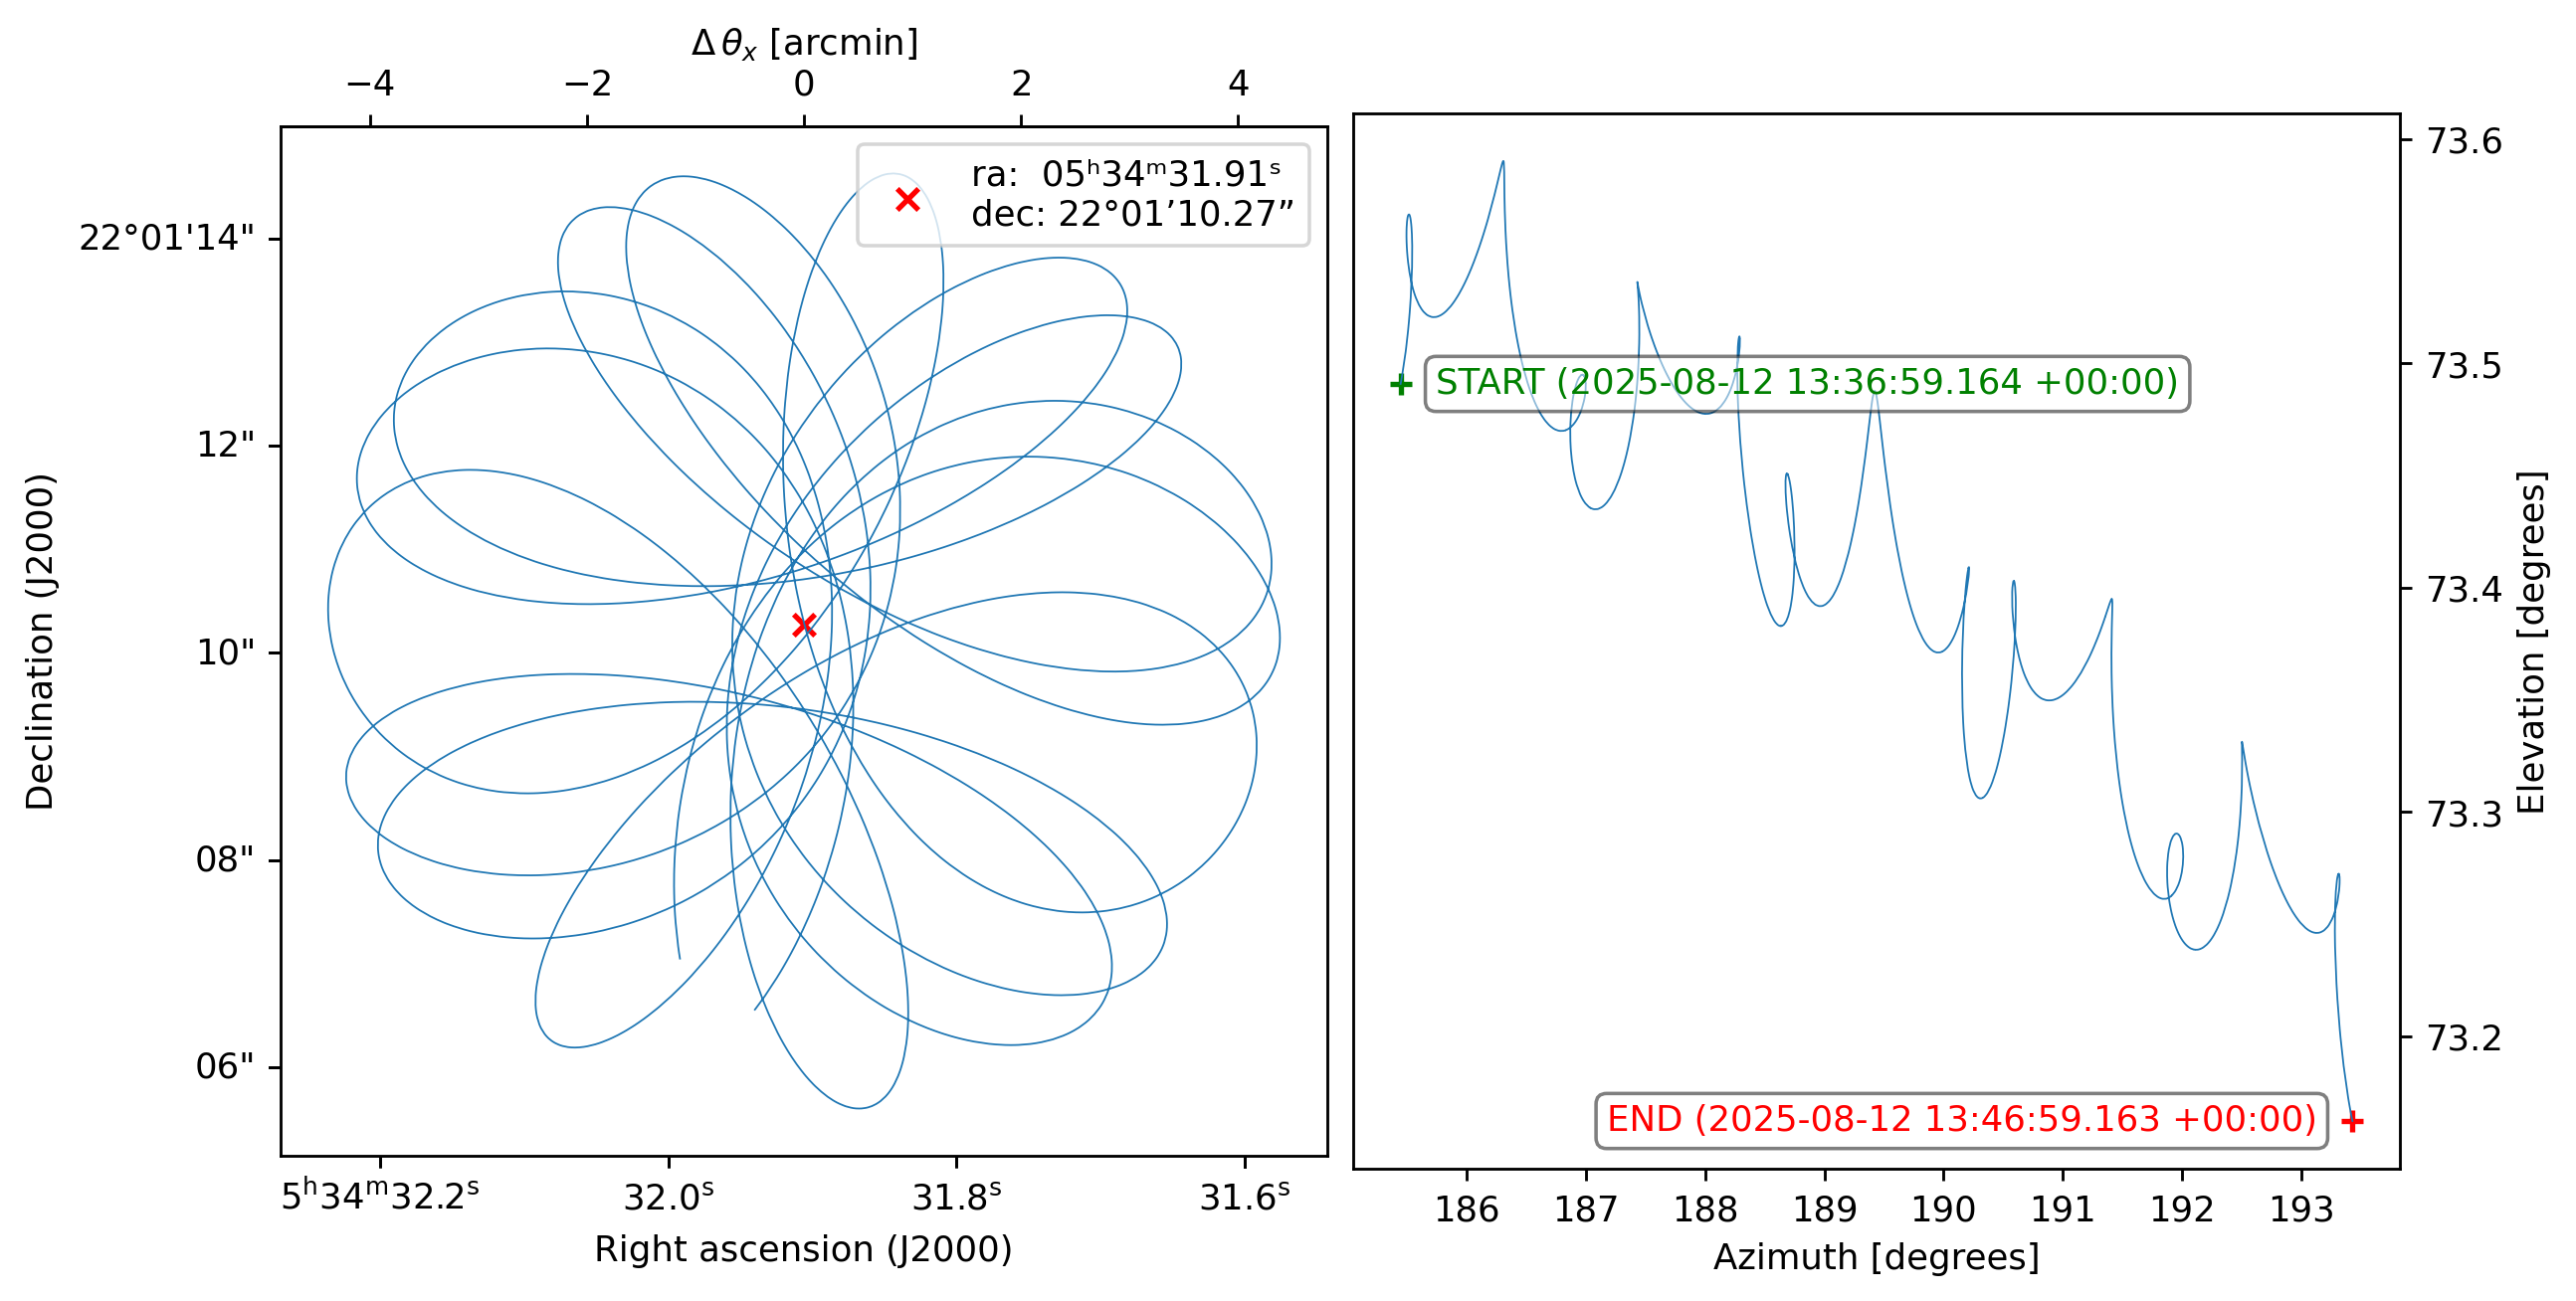

In [2]:
from maria import Planner

planner = Planner(target=input_map, site="green_bank", constraints={"el": (60, 90)})
plans = planner.generate_plans(total_duration=900, sample_rate=100)

plans[0].plot()
print(plans)

Instrument(1 array)
├ arrays:
│            n   FOV baseline      bands polarized
│  array1  217  4.2’      0 m  [m2/f093]     False
│ 
└ bands:
         name     center      width    η      NEP          NET_RJ  \
   0  m2/f093  86.21 GHz  20.98 GHz  0.1  15 aW√s  0.5711 mK_RJ√s   
   
              NET_CMB    FWHM  
   0  0.6905 mK_CMB√s  9.133”  


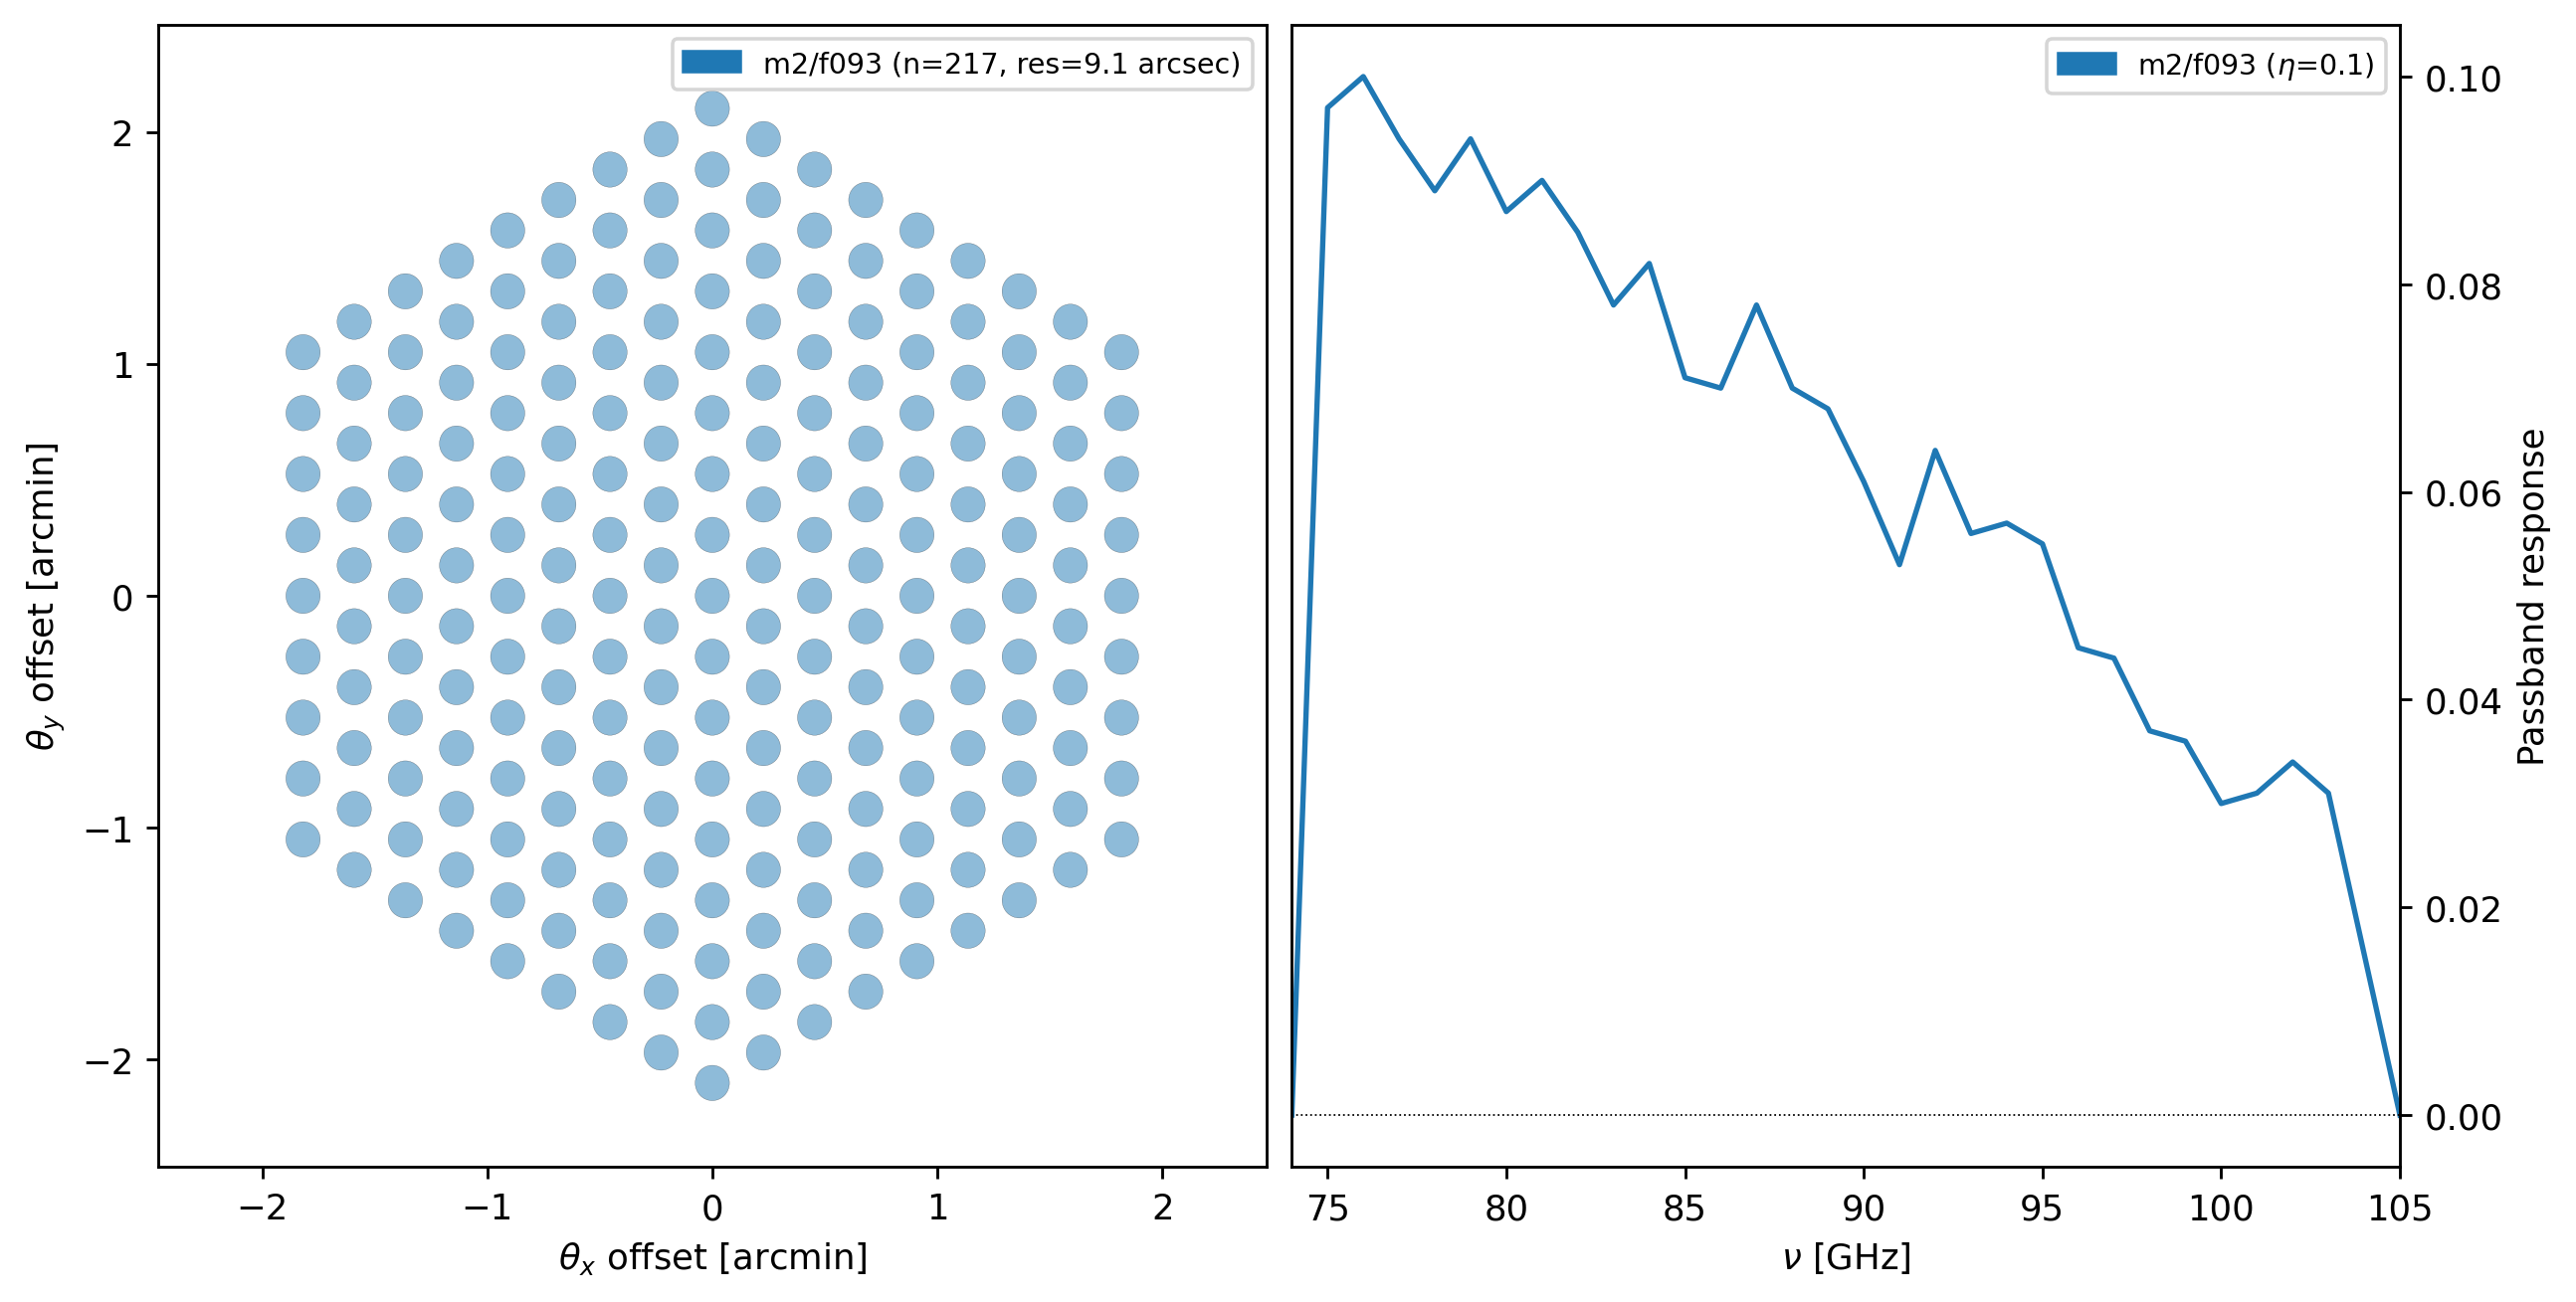

In [3]:
instrument = maria.get_instrument("MUSTANG-2")
print(instrument)
instrument.plot()

In [4]:
sim = maria.Simulation(
    instrument,
    plans=plans,
    site="green_bank",
    map=input_map,
    atmosphere="2d",
)

print(sim)

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │            n   FOV baseline      bands polarized
│ │  array1  217  4.2’      0 m  [m2/f093]     False
│ │ 
│ └ bands:
│          name     center      width    η      NEP          NET_RJ  \
│    0  m2/f093  86.21 GHz  20.98 GHz  0.1  15 aW√s  0.5711 mK_RJ√s   
│    
│               NET_CMB    FWHM  
│    0  0.6905 mK_CMB√s  9.133”  
├ Site:
│   region: green_bank
│   timezone: America/New_York
│   location:
│     longitude: 79°50’23.28” W
│     latitude:  38°25’59.16” N
│     altitude: 825 m
│   seasonal: True
│   diurnal: True
├ PlanList(2 plans, 900 s):
│                            start_time duration    target(ra,dec)  \
│ chunk                                                              
│ 0      2025-08-12 13:36:59.164 +00:00    600 s  (83.63°, 22.02°)   
│ 1      2025-08-12 13:47:36.664 +00:00    300 s  (83.63°, 22.02°)   
│ 
│           center(az,el)  
│ chunk                    
│ 0      (189.5°, 73.42°)  
│ 1      (195.9°, 73.06

2025-08-12 13:37:08.444 INFO: Simulating observation 1 of 2


Constructing atmosphere:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing atmosphere:  10%|█         | 1/10 [00:00<00:04,  2.00it/s]

Constructing atmosphere:  20%|██        | 2/10 [00:01<00:04,  1.86it/s]

Constructing atmosphere:  30%|███       | 3/10 [00:01<00:03,  1.95it/s]

Constructing atmosphere:  40%|████      | 4/10 [00:02<00:02,  2.00it/s]

Constructing atmosphere:  50%|█████     | 5/10 [00:02<00:02,  2.08it/s]

Constructing atmosphere:  60%|██████    | 6/10 [00:02<00:01,  2.06it/s]

Constructing atmosphere:  70%|███████   | 7/10 [00:03<00:01,  2.03it/s]

Constructing atmosphere:  80%|████████  | 8/10 [00:03<00:00,  2.02it/s]

Constructing atmosphere:  90%|█████████ | 9/10 [00:04<00:00,  1.99it/s]

Constructing atmosphere: 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]

Constructing atmosphere: 100%|██████████| 10/10 [00:05<00:00,  2.00it/s]

Generating turbulence:   0%|          | 0/10 [00:00<?, ?it/s]

Generating turbulence:  60%|██████    | 6/10 [00:00<00:00, 55.36it/s]

Generating turbulence: 100%|██████████| 10/10 [00:00<00:00, 52.02it/s]

Sampling turbulence:   0%|          | 0/10 [00:00<?, ?it/s]

Sampling turbulence:  10%|█         | 1/10 [00:01<00:09,  1.01s/it]

Sampling turbulence:  20%|██        | 2/10 [00:01<00:04,  1.77it/s]

Sampling turbulence:  30%|███       | 3/10 [00:01<00:02,  2.36it/s]

Sampling turbulence:  40%|████      | 4/10 [00:01<00:02,  2.47it/s]

Sampling turbulence:  50%|█████     | 5/10 [00:02<00:01,  2.86it/s]

Sampling turbulence:  60%|██████    | 6/10 [00:02<00:01,  2.81it/s]

Sampling turbulence:  70%|███████   | 7/10 [00:02<00:00,  3.09it/s]

Sampling turbulence:  80%|████████  | 8/10 [00:03<00:00,  3.32it/s]

Sampling turbulence:  90%|█████████ | 9/10 [00:03<00:00,  3.46it/s]

Sampling turbulence: 100%|██████████| 10/10 [00:03<00:00,  3.57it/s]

Sampling turbulence: 100%|██████████| 10/10 [00:03<00:00,  2.80it/s]

Computing atmospheric emission:   0%|          | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093]

Computing atmospheric emission: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s, band=m2/f093]

Computing atmospheric emission: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s, band=m2/f093]

Sampling map:   0%|          | 0/1 [00:00<?, ?it/s]

Sampling map:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093]

Sampling map:   0%|          | 0/1 [00:02<?, ?it/s, channel=(0 Hz, inf Hz)]

Sampling map: 100%|██████████| 1/1 [00:05<00:00,  5.44s/it, channel=(0 Hz, inf Hz)]

Sampling map: 100%|██████████| 1/1 [00:05<00:00,  5.44s/it, channel=(0 Hz, inf Hz)]

Generating noise:   0%|          | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093]

Generating noise: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s, band=m2/f093]

Generating noise: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s, band=m2/f093]

2025-08-12 13:37:33.927 INFO: Simulated observation 1 of 2 in 25.47 s


2025-08-12 13:37:33.928 INFO: Simulating observation 2 of 2


Constructing atmosphere:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing atmosphere:  10%|█         | 1/10 [00:00<00:02,  3.85it/s]

Constructing atmosphere:  20%|██        | 2/10 [00:00<00:02,  3.59it/s]

Constructing atmosphere:  30%|███       | 3/10 [00:00<00:01,  3.62it/s]

Constructing atmosphere:  40%|████      | 4/10 [00:01<00:01,  3.56it/s]

Constructing atmosphere:  50%|█████     | 5/10 [00:01<00:01,  3.58it/s]

Constructing atmosphere:  60%|██████    | 6/10 [00:01<00:01,  3.62it/s]

Constructing atmosphere:  70%|███████   | 7/10 [00:01<00:00,  3.61it/s]

Constructing atmosphere:  80%|████████  | 8/10 [00:02<00:00,  3.65it/s]

Constructing atmosphere:  90%|█████████ | 9/10 [00:02<00:00,  3.61it/s]

Constructing atmosphere: 100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

Constructing atmosphere: 100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

Generating turbulence:   0%|          | 0/10 [00:00<?, ?it/s]

Generating turbulence:  70%|███████   | 7/10 [00:00<00:00, 61.53it/s]

Generating turbulence: 100%|██████████| 10/10 [00:00<00:00, 61.92it/s]

Sampling turbulence:   0%|          | 0/10 [00:00<?, ?it/s]

Sampling turbulence:  10%|█         | 1/10 [00:00<00:08,  1.12it/s]

Sampling turbulence:  20%|██        | 2/10 [00:01<00:03,  2.01it/s]

Sampling turbulence:  30%|███       | 3/10 [00:01<00:02,  2.69it/s]

Sampling turbulence:  40%|████      | 4/10 [00:01<00:01,  3.21it/s]

Sampling turbulence:  50%|█████     | 5/10 [00:01<00:01,  3.59it/s]

Sampling turbulence:  60%|██████    | 6/10 [00:02<00:01,  3.42it/s]

Sampling turbulence:  70%|███████   | 7/10 [00:02<00:00,  3.72it/s]

Sampling turbulence:  80%|████████  | 8/10 [00:02<00:00,  3.93it/s]

Sampling turbulence:  90%|█████████ | 9/10 [00:02<00:00,  4.11it/s]

Sampling turbulence: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]

Sampling turbulence: 100%|██████████| 10/10 [00:02<00:00,  3.34it/s]

Computing atmospheric emission:   0%|          | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093]

Computing atmospheric emission: 100%|██████████| 1/1 [00:00<00:00,  1.57it/s, band=m2/f093]

Computing atmospheric emission: 100%|██████████| 1/1 [00:00<00:00,  1.57it/s, band=m2/f093]

Sampling map:   0%|          | 0/1 [00:00<?, ?it/s]

Sampling map:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093]

Sampling map:   0%|          | 0/1 [00:01<?, ?it/s, channel=(0 Hz, inf Hz)]

Sampling map: 100%|██████████| 1/1 [00:03<00:00,  3.25s/it, channel=(0 Hz, inf Hz)]

Sampling map: 100%|██████████| 1/1 [00:03<00:00,  3.26s/it, channel=(0 Hz, inf Hz)]

Generating noise:   0%|          | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093]

Generating noise: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s, band=m2/f093]

Generating noise: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s, band=m2/f093]

2025-08-12 13:37:48.963 INFO: Simulated observation 2 of 2 in 15.02 s


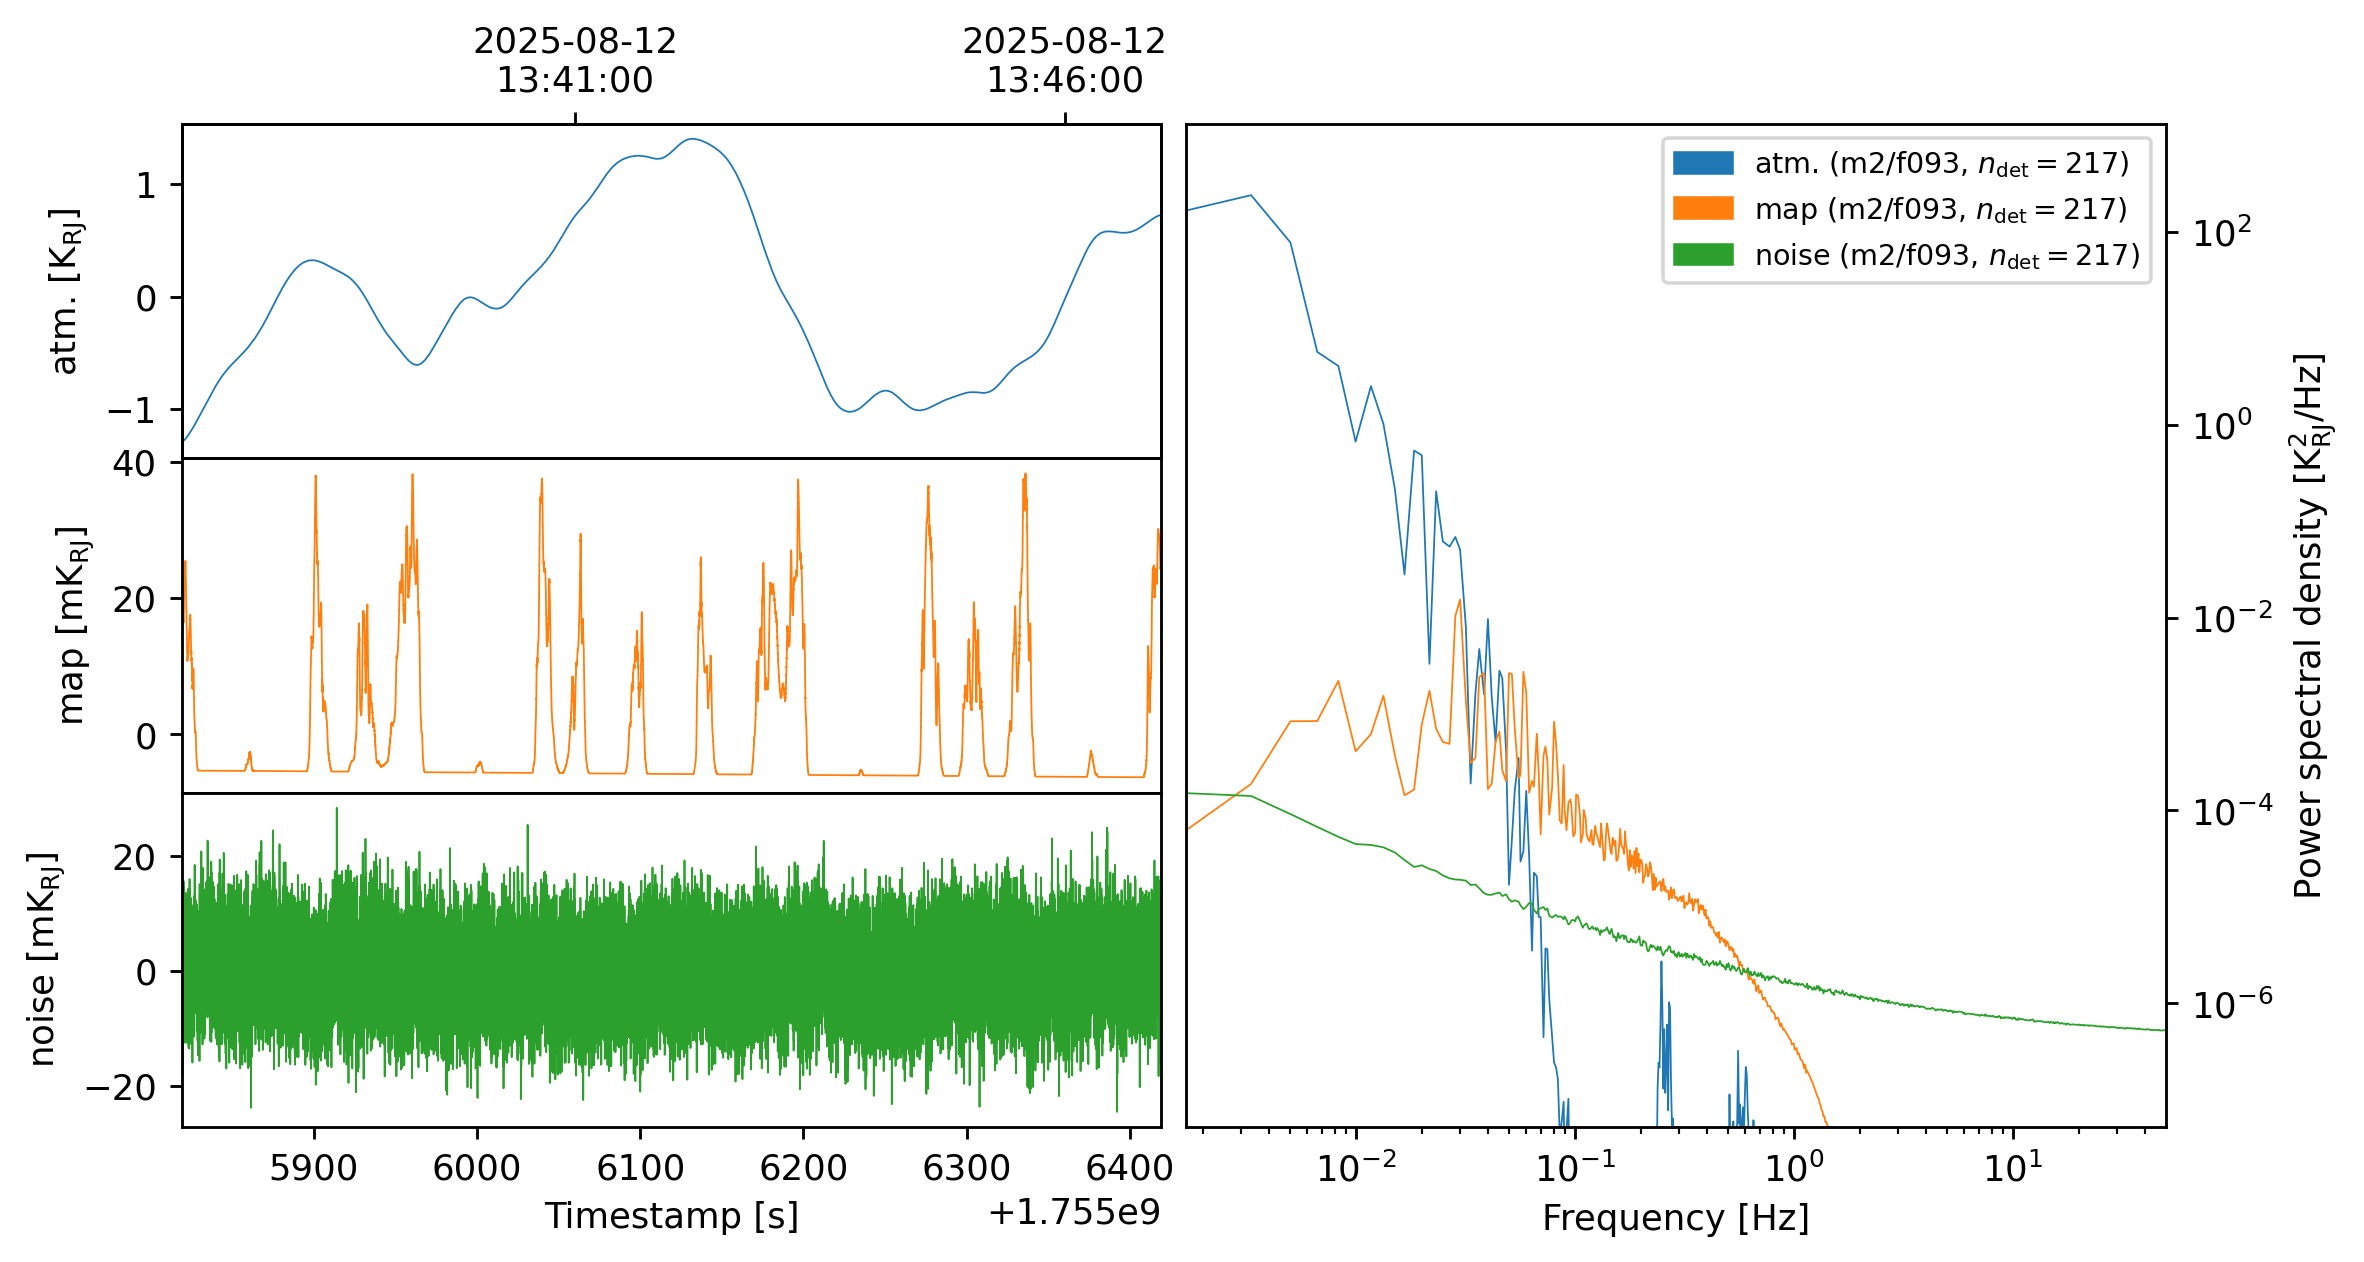

In [5]:
tods = sim.run()
tods[0].plot()

In [6]:
from maria.mappers import BinMapper

mapper = BinMapper(
    center=input_map.center,
    frame="ra/dec",
    width=10 / 60,
    height=10 / 60,
    resolution=0.05 / 60,
    tod_preprocessing={
        "window": {"name": "hamming"},
        "remove_modes": {"modes_to_remove": [0]},
        "remove_spline": {"knot_spacing": 30, "remove_el_gradient": True},
    },
    map_postprocessing={
        "gaussian_filter": {"sigma": 1},
        "median_filter": {"size": 1},
    },
    units="uK_RJ",
)

mapper.add_tods(tods)
output_map = mapper.run()

Mapping band m2/f093:   0%|          | 0/1 [00:00<?, ?it/s]

Mapping band m2/f093:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093, stokes=I]

Mapping band m2/f093: 100%|██████████| 1/1 [00:00<00:00,  8.32it/s, band=m2/f093, stokes=I]

Mapping band m2/f093: 100%|██████████| 1/1 [00:00<00:00,  8.26it/s, band=m2/f093, stokes=I]

Mapping band m2/f093:   0%|          | 0/1 [00:00<?, ?it/s]

Mapping band m2/f093:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093, stokes=I]

Mapping band m2/f093: 100%|██████████| 1/1 [00:00<00:00, 18.34it/s, band=m2/f093, stokes=I]


2025-08-12 13:37:57.440 INFO: Ran mapper for band m2/f093 in 5.797 s.


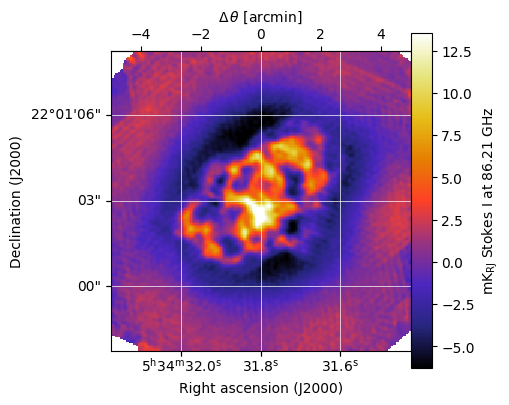

In [7]:
output_map.plot()
output_map.to_fits("/tmp/simulated_mustang_map.fits")